In [1]:
import sys
sys.path.append(r'C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_KIDS_CHAR\Instruments\VNA')
sys.path.append(r'C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_KIDS_CHAR\Instruments\Gas_Handler22')
import HP as hp
#import FridgeHandler as handler
import logging
import struct
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:

def setup_logger(log_file='test.log', level=logging.DEBUG):
    """
    Set up a file logger with the specified log file and logging level.

    Parameters:
    - log_file: Name of the log file where logs will be written.
    - level: Logging level (DEBUG, INFO, WARNING, ERROR, CRITICAL).
    """
    # Create a logger
    logger = logging.getLogger()
    logger.setLevel(level)

    # Create a file handler
    file_handler = logging.FileHandler(log_file)
    file_handler.setLevel(level)

    # Create a formatter and set it for the file handler
    formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
    file_handler.setFormatter(formatter)

    # Add the file handler to the logger
    logger.addHandler(file_handler)

    return logger


In [3]:
logger = setup_logger()

In [4]:
try:
    vna = hp.HP()
    logger.debug('Creating VNA instance')
except:
    logger.critical('Could not create VNA instance!')


In [5]:
print(vna)

In [6]:
vna.inst.write('AUTO;')

7

In [7]:
vna.set_sweep_mode()

In [8]:
vna.check_status()

(b' ', 'All is fine')

In [9]:
vna.set_chan()

In [10]:
vna.inst.write('POWE -40')

10

In [11]:
vna.set_mode('CONT')

In [12]:
vna.set_average('ON')

In [13]:
vna.set_average_fact(10)

In [14]:
vna.set_IFBW(30)

In [15]:
vna.set_smoothing('OFF')

In [16]:
vna.inst.write('POIN 1601')

11

In [17]:
vna.inst.write('SPAN 10MHZ;')

13

In [20]:
vna.inst.write("STAR 5.342 E+9;")

17

In [21]:
vna.inst.write("STOP 5.351 E+9;")

17

In [22]:
vna.set_mode('SING;OPC;')

In [23]:
vna.autoscale()

In [24]:
start = 5.342*1e9
stop = 5.351*1e9
f_n = [start + (i-1) * (stop-start)/1601  for i in range(1601)] #Get the value corresponding frequency
f_n = np.array(f_n)

In [25]:
vna.inst.write('OUTPRAW1')
_ = vna.inst.read_bytes(2)
h2 = vna.inst.read_bytes(2)
bytesnum = int.from_bytes(h2, "big")
raw = vna.inst.read_bytes(bytesnum)
format = '>' + str(bytesnum//4) + 'f' #>  stands for big-endian number; f is for floating point type
x = struct.unpack(format, raw) #Now...data are stored in binary code IEEE...to get them as ordinary numbers we have to use struct.unpack 
#and as format we have to pass the correct one for FORM2 type of data

i = np.array(x[::2])
q = np.array(x[1::2])

Text(0.5, 0, 'I channel')

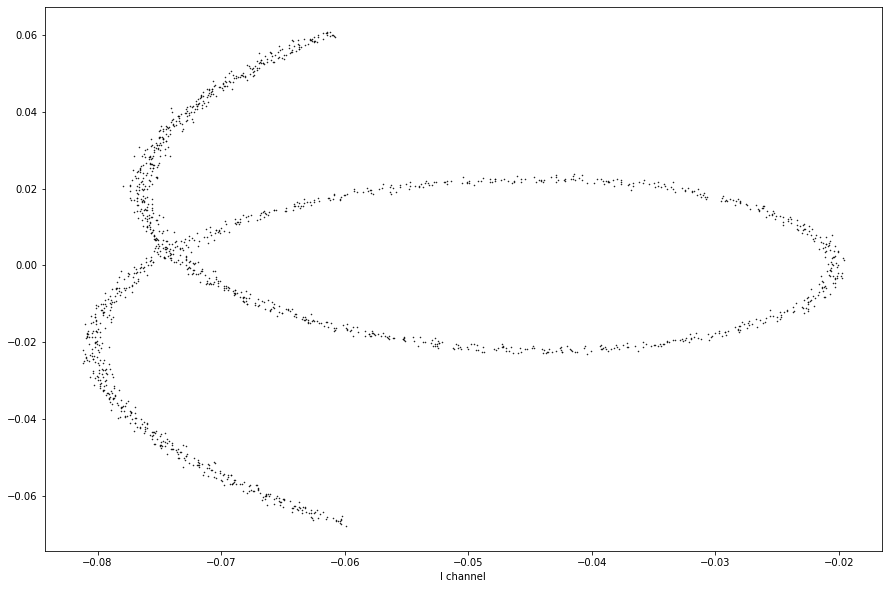

In [26]:
plt.figure(figsize=(15,10))
plt.scatter(q,i,s=1,marker='.',color='black')
plt.xlabel('Q channel')
plt.xlabel('I channel')

In [28]:
s21 = np.abs(q+1j*i)

Text(0.5, 0, '$\\nu [Hz]$')

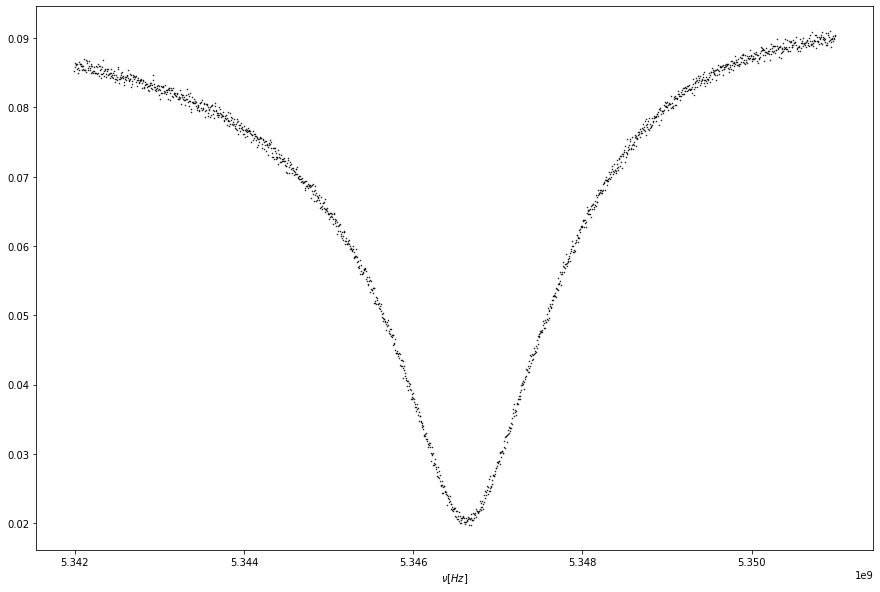

In [29]:
plt.figure(figsize=(15,10))
plt.scatter(f_n,s21,s=1,marker='.',color='black')
plt.xlabel(r'$S_{21}$')
plt.xlabel(r'$\nu [Hz]$')

In [30]:
with open('RES1.txt', 'w') as file:
    file.writelines('F'+'\t'+'I'+'\t'+'Q'+'\n')
    for k in range(len(f_n)):
        file.writelines(str(f_n[k])+'\t'+str(i[k])+'\t'+str(q[k])+'\n')